In [1]:
import astropy.units as u
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

from tools_contsub_main import *
from tools_contsub_misc import *
from tools_contsub_units import *
from tools_contsub_plots import *
from tools_contsub_anchoring import * 
from tools_contsub_smoothregrid import * 

In [2]:
galaxy = 'ngc3351'
galaxy_muse = galaxy
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 

narrowband_filter = 'f658n' # newer image
# narrowband_filter = 'f657n'
instrument_f555w  = 'uvis'
instrument_f65Xn = 'uvis'
instrument_f814w = 'uvis'

# Load files
hdu_muse_f555w  = get_hdu(rootdir, 'muse/%s*_%s_*F555W.fits' %(galaxy_muse.upper(), instrument_f555w.upper()))
hdu_muse_f65Xn  = get_hdu(rootdir, 'muse/%s*_%s_*%s.fits' %(galaxy_muse.upper(), instrument_f65Xn.upper(), narrowband_filter.upper()))
hdu_muse_f814w  = get_hdu(rootdir, 'muse/%s*_%s_*F814W.fits' %(galaxy_muse.upper(), instrument_f814w.upper()))
hdu_muse_stars  = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_muse_neb    = get_hdu(rootdir, 'muse/%s_nebmask.fits' %galaxy_muse.upper())
hdu_muse        = get_hdu(rootdir, 'muse/%s*_MAPS.fits' %galaxy_muse.upper(), 'all')

hdu_hst_f555w   = get_hdu(rootdir, 'hst/%s*_%s_*f555w*.fits' %(galaxy, instrument_f555w))
hdu_hst_f65Xn   = get_hdu(rootdir, 'hst/%s*_%s_*%s*.fits' %(galaxy, instrument_f65Xn, narrowband_filter))
hdu_hst_f814w   = get_hdu(rootdir, 'hst/%s*_%s_*f814w*.fits' %(galaxy, instrument_f814w))

# Get resolution 
hst_res  = 0.07 * u.arcsec
_, file_muse_f65Xn = get_hdu(rootdir, 'muse/%s*_%s_*%s.fits' %(galaxy_muse.upper(), instrument_f65Xn.upper(), narrowband_filter.upper()), return_filename=True)
muse_res = np.float32(file_muse_f65Xn.split('asec')[0].split('-')[-1]) * u.arcsec

# Get filter curve info
bp = get_bandpassinfo(rootdir_bp)

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc3351/muse/NGC3351-1.05asec_UVIS_F555W.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc3351/muse/NGC3351-1.05asec_UVIS_F658N.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc3351/muse/NGC3351-1.05asec_UVIS_F814W.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc3351/muse/NGC3351_starmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc3351/muse/NGC3351_nebmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc3351/muse/NGC3351-1.05asec_MAPS.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc3351/hst/ngc3351_uvis_f555w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc3351/hst/ngc3351_uvis_f658n_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc3351/hst/ngc3351_uvis_f814w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/

[Info] Outputing to the following: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc3351/hst_contsub/
[INFO] Remove NaN values around edge of image...
[INFO] Reprojecting the input image to match the template WCS...
[INFO] Performing image reprojection...
[INFO] Image reprojection complete.
[INFO] Scaling the output data to conserve flux with factor 1.00
[INFO] Flux scaling complete.
[INFO] Reprojection process completed.
[INFO] Reprojecting the input image to match the template WCS...
[INFO] Performing image reprojection...
[INFO] Image reprojection complete.
[INFO] Scaling the output data to conserve flux with factor 1.00
[INFO] Flux scaling complete.
[INFO] Reprojection process completed.
[INFO] Pixel scale: 0.04 arcsec arcsec
[INFO] Initial Resolution: 0.07 arcsec arcsec
[INFO] Desired Resolution: 1.05 arcsec arcsec
[INFO] Convolution kernel: 1.05 arcsec arcsec
[INFO] Performing image convolution...
[INFO] Image convolution complete.
[INFO] Smoothing process complet

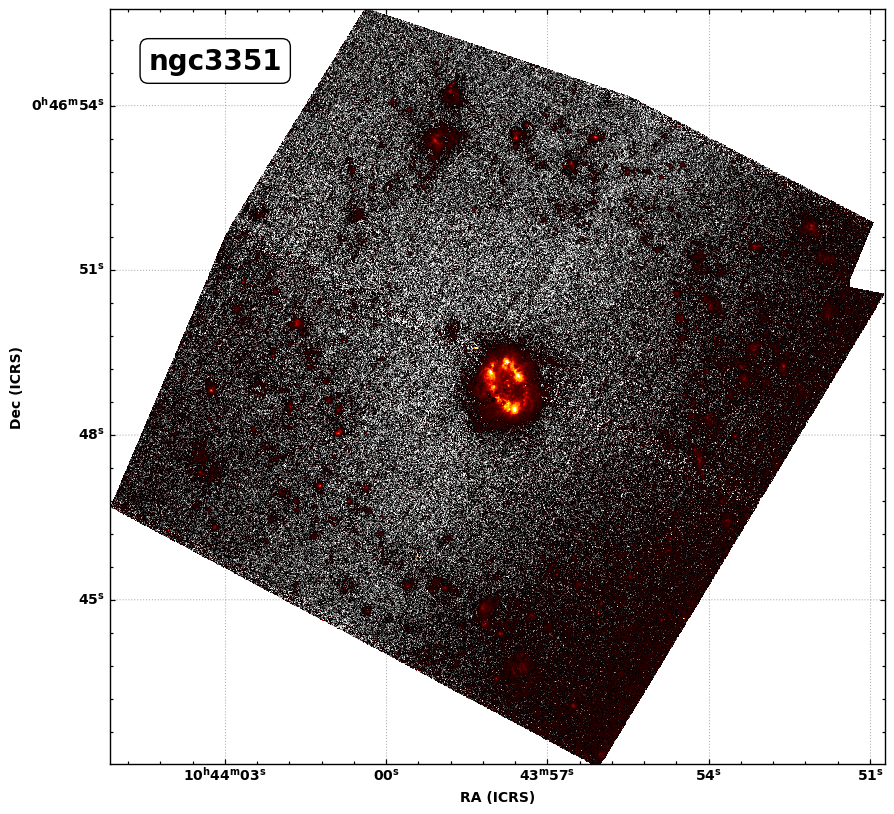

In [3]:
# Make paths
make_paths(rootdir)
remove_paths(rootdir)

# Convert units 
hdu_hst_f555w = get_nanzeros(hdu_hst_f555w)
hdu_hst_f65Xn = get_nanzeros(hdu_hst_f65Xn)
hdu_hst_f814w = get_nanzeros(hdu_hst_f814w)

hdu_hst_f65Xn = remove_nan_padding(hdu_hst_f65Xn)
hdu_hst_f555w = get_regrid(hdu_hst_f555w, hdu_hst_f65Xn)
hdu_hst_f814w = get_regrid(hdu_hst_f814w, hdu_hst_f65Xn)

hdu_hst_f555w, hdu_hst_f65Xn, hdu_hst_f814w = get_covmask(hdu_hst_f555w, hdu_hst_f65Xn, hdu_hst_f814w)

hdu_hst_f555w = get_electrons_2_ergcm2sA(hdu_hst_f555w)
hdu_hst_f65Xn = get_electrons_2_ergcm2sA(hdu_hst_f65Xn)
hdu_hst_f814w = get_electrons_2_ergcm2sA(hdu_hst_f814w)

hdu_muse_f555w = get_Jy_2_ergcm2sA(hdu_muse_f555w, bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'])
hdu_muse_f65Xn = get_Jy_2_ergcm2sA(hdu_muse_f65Xn, bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'])
hdu_muse_f814w = get_Jy_2_ergcm2sA(hdu_muse_f814w, bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])

# Smooth and regrid to MUSE
hdu_hst_f555w_sm = get_smooth(hdu_hst_f555w, hst_res, muse_res)
hdu_hst_f65Xn_sm = get_smooth(hdu_hst_f65Xn, hst_res, muse_res)
hdu_hst_f814w_sm = get_smooth(hdu_hst_f814w, hst_res, muse_res)

hdu_hst_f555w_smre = get_regrid(hdu_hst_f555w_sm, hdu_muse_f555w)
hdu_hst_f65Xn_smre = get_regrid(hdu_hst_f65Xn_sm, hdu_muse_f65Xn)
hdu_hst_f814w_smre = get_regrid(hdu_hst_f814w_sm, hdu_muse_f814w)

# Anchor filter flux density to MUSE
hdu_hst_f555w_an, hdu_hst_f555w_smrean, fit_f555w = get_anchoring_offset(hdu_muse_f555w, hdu_hst_f555w_smre, hdu_hst_f555w, hdu_muse_stars, 'f555w', rootdir)
hdu_hst_f65Xn_an, hdu_hst_f65Xn_smrean, fit_f65Xn = get_anchoring_offset(hdu_muse_f65Xn, hdu_hst_f65Xn_smre, hdu_hst_f65Xn, hdu_muse_stars, narrowband_filter, rootdir)
hdu_hst_f814w_an, hdu_hst_f814w_smrean, fit_f814w = get_anchoring_offset(hdu_muse_f814w, hdu_hst_f814w_smre, hdu_hst_f814w, hdu_muse_stars, 'f814w', rootdir)

# Make check plots
make_plots_diff(hdu_hst_f555w_smrean, hdu_muse_f555w, hdu_muse_stars, fit_f555w, 'f555w', rootdir)
make_plots_diff(hdu_hst_f65Xn_smrean, hdu_muse_f65Xn, hdu_muse_stars, fit_f65Xn, narrowband_filter, rootdir)
make_plots_diff(hdu_hst_f814w_smrean, hdu_muse_f814w, hdu_muse_stars, fit_f814w, 'f814w', rootdir)

# Continuum subtract 
hdu_muse_halpha, hdu_muse_cont = get_contsub(hdu_muse_f65Xn.copy(), 
                                hdu_muse_f555w.copy(), 
                                hdu_muse_f814w.copy(), 
                                bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
                                bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
                                bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])  

hdu_hst_an_halpha, hdu_hst_an_cont = get_contsub(hdu_hst_f65Xn_an.copy(), 
                                hdu_hst_f555w_an.copy(), 
                                hdu_hst_f814w_an.copy(), 
                                bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
                                bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
                                bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])       

hdu_hst_halpha, hdu_hst_cont = get_contsub(hdu_hst_f65Xn.copy(), 
                                hdu_hst_f555w.copy(), 
                                hdu_hst_f814w.copy(), 
                                bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
                                bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
                                bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])

# Convert units
photbw = bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['rectwidth']
hdu_hst_f65Xn_anf =  get_ergcm2sA_2_ergcm2s(hdu_hst_f65Xn_an, photbw)
hdu_muse_halpha = get_ergcm2sA_2_ergcm2s(hdu_muse_halpha, photbw)
hdu_hst_an_halpha = get_ergcm2sA_2_ergcm2s(hdu_hst_an_halpha, photbw)
hdu_hst_halpha = get_ergcm2sA_2_ergcm2s(hdu_hst_halpha, photbw)
hdu_muse_cont = get_ergcm2sA_2_ergcm2s(hdu_muse_cont, photbw)
hdu_hst_an_cont = get_ergcm2sA_2_ergcm2s(hdu_hst_an_cont, photbw)
hdu_hst_cont = get_ergcm2sA_2_ergcm2s(hdu_hst_cont, photbw)

# Make check plots
make_plots_muse_comp(hdu_muse_halpha, hdu_muse['HA6562_FLUX'], True, rootdir)
make_plots_muse_comp(hdu_muse_halpha, hdu_muse['HA6562_FLUX'], False, rootdir)
make_plots_hst_comp(hdu_hst_an_halpha, hdu_hst_halpha, True, rootdir)
make_plots_hst_comp(hdu_hst_an_halpha, hdu_hst_halpha, False, rootdir)

# Anchor Ha flux to MUSE
hdu_hst_halpha_scaled, hdu_muse_halpha_scaled, fit_halpha = get_anchoring_slope(hdu_muse['HA6562_FLUX'], hdu_muse_halpha, hdu_hst_halpha, hdu_muse_neb, '', rootdir, make_plots=False)
hdu_hst_an_halpha_scaled, hdu_muse_an_halpha_scaled, fit_an_halpha = get_anchoring_slope(hdu_muse['HA6562_FLUX'], hdu_muse_halpha, hdu_hst_an_halpha, hdu_muse_neb, 'halpha_an_neb', rootdir)

# Save fits to table 
save_fittables_offsets(fit_f555w, fit_f65Xn, fit_f814w, rootdir)
save_fittables_slope(fit_halpha, fit_an_halpha, rootdir)

# Make check plots
hdu_hst_an_halpha_scaled_sm = get_smooth(hdu_hst_an_halpha_scaled, hst_res, muse_res)
hdu_hst_an_halpha_scaled_smre = get_regrid(hdu_hst_an_halpha_scaled_sm, hdu_muse_f555w)
make_plots_fluxsubmasks(hdu_muse['HA6562_FLUX'], hdu_hst_an_halpha_scaled_smre, hdu_muse_neb, 'halpha_an_scaled_neb', rootdir)
get_anchoring_slope(hdu_muse['HA6562_FLUX'], hdu_hst_an_halpha_scaled_smre, hdu_hst_halpha, hdu_muse_neb, 'halpha_an_scaled_neb', rootdir)

# Make check plots histo
hdu_muse_neb_re = get_regrid(hdu_muse_neb, hdu_hst_an_halpha_scaled, conserve_flux=False, order='nearest-neighbor')
hdu_muse_stars_re = get_regrid(hdu_muse_stars, hdu_hst_an_halpha_scaled, conserve_flux=False, order='nearest-neighbor')
make_plots_histogram(hdu_hst_an_halpha_scaled, hdu_muse_neb_re, hdu_muse_stars_re, 'hdu_hst_an_halpha_scaled', rootdir)

# Make maps plots
make_plots_map(hdu_hst_an_halpha_scaled, galaxy, 'hst_ha', rootdir)

# Save files
write_hdu(hdu_hst_f555w_smre, rootdir, '%_hst_f555w_smre.fits' %galaxy)
write_hdu(hdu_hst_f65Xn_smre, rootdir, '%_hst_%s_smre.fits' %(galaxy, narrowband_filter))
write_hdu(hdu_hst_f814w_smre, rootdir, '%_hst_f814w_smre.fits' %galaxy)

write_hdu(hdu_hst_f555w, rootdir, '%_hst_f555w.fits' %galaxy)
write_hdu(hdu_hst_f65Xn, rootdir, '%_hst_%s.fits' %(galaxy, narrowband_filter))
write_hdu(hdu_hst_f814w, rootdir, '%_hst_f814w.fits' %galaxy)

write_hdu(hdu_muse_f555w, rootdir, '%_muse_f555w.fits' %galaxy)
write_hdu(hdu_muse_f65Xn, rootdir, '%_muse_%s.fits' %(galaxy, narrowband_filter))
write_hdu(hdu_muse_f814w, rootdir, '%_muse_f814w.fits' %galaxy)

write_hdu(hdu_hst_f555w_an, rootdir, '%_hst_f555w_an.fits' %galaxy)
write_hdu(hdu_hst_f65Xn_an, rootdir, '%_hst_%s_an.fits' %(galaxy, narrowband_filter))
write_hdu(hdu_hst_f814w_an, rootdir, '%_hst_f814w_an.fits' %galaxy)

write_hdu(hdu_muse_halpha, rootdir, '%_muse_%s_contsub.fits' %(galaxy, narrowband_filter))
write_hdu(hdu_hst_an_halpha, rootdir, '%_hst_%s_an_contsub.fits' %(galaxy, narrowband_filter))
write_hdu(hdu_hst_halpha, rootdir, '%_hst_%s_contsub.fits' %(galaxy, narrowband_filter))

write_hdu(hdu_muse_cont, rootdir, '%_muse_%s_cont.fits' %(galaxy, narrowband_filter))
write_hdu(hdu_hst_an_cont, rootdir, '%_hst_%s_an_cont.fits' %(galaxy, narrowband_filter))
write_hdu(hdu_hst_cont, rootdir, '%_hst_%s_cont.fits' %(galaxy, narrowband_filter))

write_hdu(hdu_muse['HA6562_FLUX'], rootdir, '%_muse_ha.fits' %galaxy)
write_hdu(hdu_hst_halpha_scaled, rootdir, '%_hst_ha.fits' %galaxy)
write_hdu(hdu_hst_an_halpha_scaled, rootdir, '%_hst_an_ha.fits' %galaxy)